In [1]:
import pandas as pd
import ast
import numpy as np
import json
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge ,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
cities=[r"C:\Users\Tanvi\Downloads\Dataset-20240824T223819Z-001\Dataset\hyderabad_cars.xlsx",
    r"C:\Users\Tanvi\Downloads\Dataset-20240824T223819Z-001\Dataset\jaipur_cars.xlsx",
    r"C:\Users\Tanvi\Downloads\Dataset-20240824T223819Z-001\Dataset\delhi_cars.xlsx",
    r"C:\Users\Tanvi\Downloads\Dataset-20240824T223819Z-001\Dataset\kolkata_cars.xlsx",
    r"C:\Users\Tanvi\Downloads\Dataset-20240824T223819Z-001\Dataset\chennai_cars.xlsx",
    r"C:\Users\Tanvi\Downloads\Dataset-20240824T223819Z-001\Dataset\bangalore_cars.xlsx"
]

city_names = ["Hyderabad", "Jaipur", "Delhi", "Chennai", "Kolkata", "Bangalore"]

# Creating an empty list to store the dataframes
dfs = []

for city, name in zip(cities, city_names):
    df = pd.read_excel(city)
    df['City'] = name  # Add the city column
    dfs.append(df)

# Combine all dataframes into a single +
data = pd.concat(dfs, ignore_index=True)
data
         

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,City
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Hyderabad
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Hyderabad
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Hyderabad
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Hyderabad
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Hyderabad
...,...,...,...,...,...,...
8364,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
8367,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore


In [4]:
# Drop 'car_links' column
data = data.drop('car_links', axis=1)
     

In [5]:
data.loc[0,'new_car_detail']

"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '20,000', 'transmission': 'Automatic', 'ownerNo': 1, 'owner': '1st Owner', 'oem': 'Volkswagen', 'model': 'Volkswagen Polo', 'modelYear': 2022, 'centralVariantId': 7746, 'variantName': '1.0 TSI Highline Plus AT', 'price': '₹ 10.44 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [6]:
# Define a function to safely parse the JSON-like strings
def parse_json_like(column_data):
    try:
        return ast.literal_eval(column_data)
    except:
        return {}

# Apply the parsing function to the 'new_car_detail' column
data['parsed_car_detail'] = data['new_car_detail'].apply(parse_json_like)

# Extracting relevant fields from the parsed data
car_detail_df = pd.json_normalize(data['parsed_car_detail'])

# Display the extracted fields
print(car_detail_df)
#print(car_detail_df.head())

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback    20,000    Automatic        1  1st Owner   
1      0  Petrol  Hatchback    85,582       Manual        2  2nd Owner   
2      0  Petrol        SUV    10,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback    50,750       Manual        1  1st Owner   
4      0  Petrol        SUV    10,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
8364   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
8365   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
8366   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
8367   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
8368   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

             oem              model  modelYear  centralVariantId  \
0     Volkswagen    Volkswagen Polo       2

In [7]:
car_detail_df.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText.imgUrl',
       'trendingText.heading', 'trendingText.desc'],
      dtype='object')

In [8]:
car_detail_df.drop(columns=[ 'it','owner','centralVariantId','priceActual','priceSaving','priceFixedText','trendingText.imgUrl','trendingText.heading','trendingText.desc'],inplace=True)

In [9]:
car_detail_df.columns

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'variantName', 'price'],
      dtype='object')

In [10]:
# overview column structuring and deleting the unnecessary data

In [11]:
data.loc[0,['new_car_overview']]

new_car_overview    {'heading': 'Car overview', 'top': [{'key': 'R...
Name: 0, dtype: object

In [12]:


# Apply the parsing function to new_car_overview' column
data['parsed_car_overview'] = data['new_car_overview'].apply(parse_json_like)

# Function to extract key-value pairs from the 'top' list in each column
def extract_top_data(column_data, prefix):
    extracted_data = {}
    for item in column_data:
        key = f"{prefix}_{item.get('key', '').replace(' ', '_').lower()}"
        extracted_data[key] = item.get('value', None)
    return extracted_data

# Extracting details from 'new_car_overview'
data['overview_details'] = data['parsed_car_overview'].apply(lambda x: extract_top_data(x.get('top', []), 'overview'))
     
# Creating DataFrames from the extracted data
overview_details_df = pd.DataFrame(data['overview_details'].tolist())
print(overview_details_df)



     overview_registration_year overview_insurance_validity  \
0                          2022       Third Party insurance   
1                      Oct 2014       Third Party insurance   
2                          2023       Third Party insurance   
3                      Mar 2017       Third Party insurance   
4                          2022       Third Party insurance   
...                         ...                         ...   
8364                   May 2012               Comprehensive   
8365                   Jun 2008       Third Party insurance   
8366                  Sept 2014               Comprehensive   
8367                   Dec 2018               Comprehensive   
8368                   May 2017               Comprehensive   

     overview_fuel_type overview_seats overview_kms_driven overview_rto  \
0                Petrol        5 Seats          20,000 Kms         TS04   
1                Petrol        5 Seats          85,582 Kms         TS09   
2                P

In [13]:
# Deleting the column which is same as car details data

In [14]:
overview_details_df.drop(columns=['overview_transmission','overview_ownership','overview_kms_driven','overview_fuel_type','overview_year_of_manufacture'],inplace=True)

In [15]:
data.loc[0,['new_car_feature']]

new_car_feature    {'heading': 'Features', 'top': [{'value': 'Pow...
Name: 0, dtype: object

In [16]:
data['parsed_car_feature'] = data['new_car_feature'].apply(parse_json_like)

# Extracting top features
data['top_features'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for item in x['top']])
# Extracting data for Comfort & Convenience
data['comfort_and_convenience'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Comfort & Convenience' for item in section['list']])

# Extracting data for Interior
data['interior'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Interior' for item in section['list']])

# Extracting data for Exterior
data['exterior'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Exterior' for item in section['list']])

# Extracting data for Safety
data['safety'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Safety' for item in section['list']])

# Extracting data for Entertainment & Communication
data['entertainment_communication'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Entertainment & Communication' for item in section['list']])

features_df = pd.DataFrame(data[['top_features','comfort_and_convenience','interior','exterior','safety','entertainment_communication']],columns=['top_features','comfort_and_convenience','interior','exterior','safety','entertainment_communication'])

In [17]:
features_df.head()

,top_features,comfort_and_convenience,interior,exterior,safety,entertainment_communication
0,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Fog...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Speakers Front, Speakers Rear, Usb Aux..."
1,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Remote T...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E...","[Child Safety Locks, Driver Air Bag, Day Night...",[]
2,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Power Adjustable Exte...","[Anti Lock Braking System, Brake Assist, Cente...","[Radio, Speakers Front, Speakers Rear, Integra..."
3,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Audio System Remote Control, Speakers ..."
4,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Low Fuel...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Brake Assist, Cente...","[Radio, Speakers Front, Speakers Rear, Integra..."


In [18]:
features_df.loc[0,'top_features']

['Power Steering',
 'Power Windows Front',
 'Air Conditioner',
 'Heater',
 'Adjustable Head Lights',
 'Fog Lights Front',
 'Anti Lock Braking System',
 'Centeral Locking',
 'Radio']

In [19]:
features_df.loc[0,'interior']

['Air Conditioner',
 'Heater',
 'Adjustable Steering',
 'Digital Odometer',
 'Tachometer',
 'Electronic Multi Tripmeter',
 'Fabric Upholstery',
 'Leather Steering Wheel',
 'Glove Compartment',
 'Digital Clock',
 'Height Adjustable Driver Seat',
 'Dual Tone Dashboard',
 'Leather Wrap Gear Shift Selector']

In [20]:
features_df.loc[0,'exterior']

['Adjustable Head Lights',
 'Fog Lights Front',
 'Fog Lights Rear',
 'Power Adjustable Exterior Rear View Mirror',
 'Electric Folding Rear View Mirror',
 'Rain Sensing Wiper',
 'Rear Window Wiper',
 'Rear Window Washer',
 'Rear Window Defogger',
 'Alloy Wheels',
 'Power Antenna',
 'Integrated Antenna',
 'Outside Rear View Mirror Turn Indicators',
 'Cornering Headlamps',
 'Halogen Headlamps']

In [21]:
features_df.loc[0,'comfort_and_convenience']

['Power Steering',
 'Power Windows Front',
 'Power Windows Rear',
 'Remote Trunk Opener',
 'Low Fuel Warning Light',
 'Accessory Power Outlet',
 'Vanity Mirror',
 'Rear Seat Headrest',
 'Cup Holders Front',
 'Seat Lumbar Support',
 'Multifunction Steering Wheel',
 'Cruise Control',
 'Rear ACVents',
 'Glove Box Cooling',
 'Voice Control',
 'Gear Shift Indicator',
 'Lane Change Indicator',
 'Adjustable Headrest']

In [22]:
features_df.loc[0,'entertainment_communication']

['Radio',
 'Speakers Front',
 'Speakers Rear',
 'Usb Auxiliary Input',
 'Bluetooth',
 'Touch Screen',
 'Number Of Speaker',
 'Apple Car Play',
 'Android Auto',
 'Mirror Link']

In [23]:
features_df.loc[0,'safety']

['Anti Lock Braking System',
 'Centeral Locking',
 'Power Door Locks',
 'Child Safety Locks',
 'Driver Air Bag',
 'Passenger Air Bag',
 'Day Night Rear View Mirror',
 'Passenger Side Rear View Mirror',
 'Halogen Headlamps',
 'Rear Seat Belts',
 'Seat Belt Warning',
 'Side Impact Beams',
 'Front Impact Beams',
 'Vehicle Stability Control System',
 'Adjustable Seats',
 'Keyless Entry',
 'Centrally Mounted Fuel Tank',
 'Engine Immobilizer',
 'Engine Check Warning',
 'Crash Sensor',
 'Ebd',
 'Anti Theft Device',
 'Anti Pinch Power Windows',
 'Speed Sensing Auto Door Lock',
 'Isofix Child Seat Mounts',
 'Pretensioners And Force Limiter Seatbelts',
 'Hill Assist',
 'Impact Sensing Auto Door Lock',
 'No Of Airbags',
 'Eletronic Stability Control']

In [24]:
import pandas as pd

def create_binary_columns(features_df, column_name):
    # Create a set of all unique features in the specified column
    feature_set = set()
    features_df[column_name].apply(lambda x: feature_set.update([feature.strip() for feature in x]) if isinstance(x, list) else [])
    

    # Create a temporary DataFrame to hold the new binary columns
    binary_columns = pd.DataFrame()

    # Populate the temporary DataFrame with binary columns
    for feature in feature_set:
        binary_column_name = feature.replace(' ', '_')  # Simple name based on the feature itself
        binary_columns[binary_column_name] = data[column_name].apply(lambda x: 1 if isinstance(x, list) and feature in [item.strip() for item in x] else 0)

    # Return the DataFrame with old column removed and new binary columns added
    return pd.concat([features_df, binary_columns], axis=1)

# Example usage on a DataFrame


# Apply the function to each column and update the DataFrame
features_df= create_binary_columns(features_df, 'top_features')
features_df = create_binary_columns(features_df, 'comfort_and_convenience')
features_df= create_binary_columns(features_df, 'interior')
features_df= create_binary_columns(features_df, 'exterior')
features_df= create_binary_columns(features_df, 'safety')
features_df= create_binary_columns(features_df,'entertainment_communication')

# Display the resulting DataFrame
print(features_df.head())



                                        top_features  \
0  [Power Steering, Power Windows Front, Air Cond...   
1  [Power Steering, Power Windows Front, Air Cond...   
2  [Power Steering, Power Windows Front, Air Cond...   
3  [Power Steering, Power Windows Front, Air Cond...   
4  [Power Steering, Power Windows Front, Air Cond...   

                             comfort_and_convenience  \
0  [Power Steering, Power Windows Front, Power Wi...   
1  [Power Steering, Power Windows Front, Remote T...   
2  [Power Steering, Power Windows Front, Power Wi...   
3  [Power Steering, Power Windows Front, Power Wi...   
4  [Power Steering, Power Windows Front, Low Fuel...   

                                            interior  \
0  [Air Conditioner, Heater, Adjustable Steering,...   
1  [Air Conditioner, Heater, Digital Odometer, El...   
2  [Air Conditioner, Heater, Adjustable Steering,...   
3  [Air Conditioner, Heater, Adjustable Steering,...   
4  [Air Conditioner, Heater, Adjustable Steeri

In [25]:
features_df.drop(columns=['top_features','comfort_and_convenience','interior','exterior','safety','entertainment_communication'],inplace=True)

In [26]:
features_df

,Power_Windows_Rear,Digital_Clock,Adjustable_Steering,Speakers_Rear,Air_Quality_Control,Integrated_Antenna,Vanity_Mirror,Rear_Folding_Table,Radio,Navigation_System,Engine_Immobilizer,Rear_Window_Defogger,Power_Steering,Audio_System_Remote_Control,Remote_Trunk_Opener,Drive_Modes,Remote_Fuel_Lid_Opener,Passenger_Air_Bag,Integrated2Din_Audio,Fog_Lights_Rear,Dvd_Player,Wheel_Covers,Low_Fuel_Warning_Light,Adjustable_Seats,Cup_Holders_Front,Touch_Screen,Sun_Roof,Electronic_Multi_Tripmeter,Brake_Assist,Fog_Lights_Front,Glove_Compartment,Side_Air_Bag_Front,Number_Of_Speaker,Rear_Seat_Belts,Heater,Tinted_Glass,Anti_Theft_Alarm,Day_Night_Rear_View_Mirror,Usb_Auxiliary_Input,Accessory_Power_Outlet,Rear_Seat_Headrest,Passenger_Side_Rear_View_Mirror,Tachometer,Leather_Steering_Wheel,Tyre_Pressure_Monitor,Power_Adjustable_Exterior_Rear_View_Mirror,Speakers_Front,Anti_Lock_Braking_System,Digital_Odometer,Cd_Changer,Child_Safety_Locks,Power_Door_Locks,Electric_Folding_Rear_View_Mirror,Fabric_Upholstery,Power_Windows_Front,Multifunction_Steering_Wheel,Cd_Player,Bluetooth,Cassette_Player,Halogen_Headlamps,Driving_Experience_Control_Eco,Rear_Spoiler,Cruise_Control,Alloy_Wheels,Air_Conditioner,Leather_Seats,Trunk_Light,Power_Antenna,Manually_Adjustable_Exterior_Rear_View_Mirror,Adjustable_Head_Lights,Moon_Roof,Rear_Window_Wiper,Driver_Air_Bag,Centeral_Locking,LEDDRLs,Power_Windows_Rear,Air_Quality_Control,Remote_Climate_Control,Vanity_Mirror,Navigation_System,Power_Steering,Remote_Trunk_Opener,Gear_Shift_Indicator,Drive_Modes,Remote_Fuel_Lid_Opener,Steering_Mounted_Tripmeter,Low_Fuel_Warning_Light,Active_Noise_Cancellation,Cup_Holders_Front,Power_Folding3rd_Row_Seat,Voice_Control,Adjustable_Headrest,Rear_Seat_Centre_Arm_Rest,Hands_Free_Tailgate,Real_Time_Vehicle_Tracking,Cup_Holders_Rear,Tailgate_Ajar,Remote_Horn_Light_Control,Accessory_Power_Outlet,Rear_Seat_Headrest,Engine_Start_Stop_Button,Smart_Key_Band,Remote_Engine_Start_Stop,Power_Windows_Front,Seat_Lumbar_Support,Luggage_Hook_And_Net,Smart_Access_Card_Entry,Multifunction_Steering_Wheel,Cruise_Control,Height_Adjustable_Front_Seat_Belts,Steering_Wheel_Gearshift_Paddles,Lane_Change_Indicator,Glove_Box_Cooling,Trunk_Light,Rear_ACVents,Find_My_Car_Location,Rear_Reading_Lamp,Battery_Saver,Power_Boot,Digital_Clock,Adjustable_Steering,Height_Adjustable_Driver_Seat,Rear_Folding_Table,Outside_Temperature_Display,Ventilated_Seats,Cigarette_Lighter,Electronic_Multi_Tripmeter,Glove_Compartment,Heater,Leather_Steering_Wheel,Tachometer,Digital_Odometer,Dual_Tone_Dashboard,Leather_Wrap_Gear_Shift_Selector,Fabric_Upholstery,Driving_Experience_Control_Eco,Air_Conditioner,Leather_Seats,Projector_Headlamps,Integrated_Antenna,Automatic_Driving_Lights,Rear_Window_Defogger,Fog_Lights_Rear,Wheel_Covers,Rain_Sensing_Wiper,Sun_Roof,Cornering_Foglamps,Dual_Tone_Body_Colour,Heated_Wing_Mirror,Headlamp_Washers,Tinted_Glass,LEDHeadlights,Removable_Convertible_Top,Chrome_Garnish,Chrome_Grille,LEDFog_Lamps,Power_Adjustable_Exterior_Rear_View_Mirror,Electric_Folding_Rear_View_Mirror,Roof_Carrier,LEDTaillights,Alloy_Wheels,Side_Stepper,Roof_Rail,Smoke_Headlamps,Rear_Window_Washer,Halogen_Headlamps,Rear_Spoiler,Power_Antenna,Manually_Adjustable_Exterior_Rear_View_Mirror,Adjustable_Head_Lights,Moon_Roof,Rear_Window_Wiper,Cornering_Headlamps,Fog_Lights_Front,Outside_Rear_View_Mirror_Turn_Indicators,LEDDRLs,Speed_Alert,Lane_Watch_Camera,Vehicle_Stability_Control_System,Engine_Immobilizer,Heads_Up_Display,Front_Impact_Beams,Isofix_Child_Seat_Mounts,Passenger_Air_Bag,Adjustable_Seats,Speed_Sensing_Auto_Door_Lock,Side_Air_Bag_Rear,Engine_Check_Warning,Clutch_Lock,Pretensioners_And_Force_Limiter_Seatbelts,Side_Impact_Beams,Crash_Sensor,Knee_Airbags,Door_Ajar_Warning,Brake_Assist,Ebd,Side_Air_Bag_Front,No_Of_Airbags,Automatic_Head_Lamps,Rear_Seat_Belts,Seat_Belt_Warning,Anti_Theft_Alarm,Day_Night_Rear_View_Mirror,Passenger_Side_Rear_View_Mirror,Anti_Pinch_Power_Windows,Tyre_Pressure_Monitor,Centrally_Mounted_Fuel_Tank,View360Camer

In [27]:
# Drop columns where more than 50% of the data is zero
def drop_columns_with_high_zero_proportion(features_df, threshold=0.5):
    # Calculate the proportion of zero values for each column
    zero_proportion = (features_df == 0).mean()

    # Drop columns where the proportion of zeros is greater than the threshold
    columns_to_drop = zero_proportion[zero_proportion > threshold].index
    features_df.drop(columns=columns_to_drop, inplace=True)

# Example usage
drop_columns_with_high_zero_proportion(features_df)

# View the updated DataFrame
print(features_df)


      Power_Steering  Fog_Lights_Front  Heater  Anti_Lock_Braking_System  \
0                  1                 1       1                         1   
1                  1                 0       1                         0   
2                  1                 0       1                         1   
3                  1                 1       1                         1   
4                  1                 1       1                         1   
...              ...               ...     ...                       ...   
8364               1                 1       1                         1   
8365               1                 1       1                         1   
8366               1                 0       1                         0   
8367               1                 1       1                         1   
8368               1                 1       1                         1   

      Power_Windows_Front  Air_Conditioner  Adjustable_Head_Lights  \
0                

In [28]:
features_df.columns

Index(['Power_Steering', 'Fog_Lights_Front', 'Heater',
       'Anti_Lock_Braking_System', 'Power_Windows_Front', 'Air_Conditioner',
       'Adjustable_Head_Lights', 'Centeral_Locking', 'Power_Steering',
       'Power_Windows_Front', 'Height_Adjustable_Driver_Seat', 'Heater',
       'Air_Conditioner', 'Chrome_Grille', 'Adjustable_Head_Lights',
       'Fog_Lights_Front', 'Outside_Rear_View_Mirror_Turn_Indicators',
       'Front_Impact_Beams', 'Engine_Check_Warning', 'Side_Impact_Beams',
       'Crash_Sensor', 'Door_Ajar_Warning', 'Ebd', 'Seat_Belt_Warning',
       'Centrally_Mounted_Fuel_Tank', 'Anti_Lock_Braking_System',
       'Anti_Theft_Device', 'Keyless_Entry', 'Centeral_Locking'],
      dtype='object')

In [29]:
data.loc[0,'new_car_specs']

"{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '16.47 kmpl'}, {'key': 'Engine', 'value': '999 CC'}, {'key': 'Max Power', 'value': '108.62bhp'}, {'key': 'Torque', 'value': '175nm'}, {'key': 'Wheel Size', 'value': 'R16'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'Others'}, {'key': 'Engine Type', 'value': '1.0L TSI Petrol'}, {'key': 'Displacement', 'value': '999'}, {'key': 'Max Power', 'value': '108.62bhp@5000-5500rpm'}, {'key': 'Max Torque', 'value': '175nm@1750-4000rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'TSI'}, {'key': 'BoreX Stroke', 'value': '74.5x76.4 mm'}, {'key': 'Compression Ratio', 'value': '10.5:1'}, {'key': 'Turbo Charger', 'value': 'Yes'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHe

In [30]:
# Apply the parsing function to new_car_specs column
data['parsed_car_specs'] = data['new_car_specs'].apply(parse_json_like)

#Extracting data from Top details
data['top_details'] = data['parsed_car_specs'].apply(lambda x: extract_top_data(x.get('top', []), 'specs'))
specs_details_df=pd.DataFrame(data['top_details'].tolist())

# Extracting data for Engine and Transmission
engine_data = data['parsed_car_specs'].apply(lambda x: x['data'][0]['list'] if 'data' in x and x['data'] else None)

specs_details_df['engine_type'] = engine_data.apply(lambda x: next((item['value'] for item in x if item['key'] == 'Engine Type'), None))
specs_details_df['displacement'] = engine_data.apply(lambda x: next((item['value'] for item in x if item['key'] == 'Displacement'), None))
specs_details_df['cylinders'] = engine_data.apply(lambda x: next((item['value'] for item in x if item['key'] == 'No of Cylinder'), None))

# Extracting data for Dimensions & Capacity
dimensions_data = data['parsed_car_specs'].apply(lambda x: x['data'][1]['list'] if 'data' in x and len(x['data']) > 1 else None)


# Define a function to extract values based on the key
def extract_value(data, key):
    if data:
        for item in data:
            if item['key'] == key:
                return item['value']
    return None

# Use the function to extract values for length, width, and height
specs_details_df['length'] = dimensions_data.apply(lambda x: extract_value(x, 'Length'))
specs_details_df['width'] = dimensions_data.apply(lambda x: extract_value(x, 'Width'))
specs_details_df['height'] = dimensions_data.apply(lambda x: extract_value(x, 'Height'))





In [31]:
specs_details_df

,specs_mileage,specs_engine,specs_max_power,specs_torque,specs_wheel_size,specs_seats,engine_type,displacement,cylinders,length,width,height
0,16.47 kmpl,999 CC,108.62bhp,175nm,R16,5,1.0L TSI Petrol,999,3.0,3971mm,1682mm,1469mm
1,21.1 kmpl,814 CC,55.2bhp,74.5Nm,NaN,5,Petrol Engine,814,3.0,3495mm,1550mm,1500mm
2,NaN,1197 CC,81.80bhp,113.8Nm,NaN,5,1.2 Kappa Petrol,1197,4.0,3995mm,1770mm,1617mm
3,21.4 kmpl,1197 CC,83.1bhp,115Nm,16,5,VVT Petrol Engine,1197,4.0,3995mm,1745mm,1510mm
4,NaN,1997 CC,150bhp,320Nm,18,4,mStallion 150 TGDi Engine,1997,4.0,3985mm,1855mm,1844mm
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,12.55 kmpl,2982 CC,168.5bhp,343Nm,17,7,D-4D Diesel Engine,2982,4.0,4705mm,1840mm,1850mm
8365,15 kmpl,1586 CC,104.68,145,16,5,In-Line Engine,1586,4.0,4490mm,1735mm,1570mm
8366,19.4 kmpl,1198 CC,86.8bhp,109Nm,NaN,5,i-VTEC Engine,1198,4.0,3610mm,1680mm,1500mm
8367,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,16,5,U2 CRDI Diesel Engine,1396,4.0,3985mm,1734mm,1505mm


In [32]:
# Concatenating the cleaned data with the city column
new_data = pd.concat([car_detail_df,overview_details_df,specs_details_df,features_df,data['City']], axis=1)
new_data


,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,overview_registration_year,overview_insurance_validity,overview_seats,overview_rto,overview_engine_displacement,specs_mileage,specs_engine,specs_max_power,specs_torque,specs_wheel_size,specs_seats,engine_type,displacement,cylinders,length,width,height,Power_Steering,Fog_Lights_Front,Heater,Anti_Lock_Braking_System,Power_Windows_Front,Air_Conditioner,Adjustable_Head_Lights,Centeral_Locking,Power_Steering,Power_Windows_Front,Height_Adjustable_Driver_Seat,Heater,Air_Conditioner,Chrome_Grille,Adjustable_Head_Lights,Fog_Lights_Front,Outside_Rear_View_Mirror_Turn_Indicators,Front_Impact_Beams,Engine_Check_Warning,Side_Impact_Beams,Crash_Sensor,Door_Ajar_Warning,Ebd,Seat_Belt_Warning,Centrally_Mounted_Fuel_Tank,Anti_Lock_Braking_System,Anti_Theft_Device,Keyless_Entry,Centeral_Locking,City
0,Petrol,Hatchback,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,2022,Third Party insurance,5 Seats,TS04,999 cc,16.47 kmpl,999 CC,108.62bhp,175nm,R16,5,1.0L TSI Petrol,999,3.0,3971mm,1682mm,1469mm,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,Hyderabad
1,Petrol,Hatchback,"85,582",Manual,2,Hyundai,Hyundai EON,2014,Era Plus,₹ 2.60 Lakh,Oct 2014,Third Party insurance,5 Seats,TS09,814 cc,21.1 kmpl,814 CC,55.2bhp,74.5Nm,NaN,5,Petrol Engine,814,3.0,3495mm,1550mm,1500mm,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,Hyderabad
2,Petrol,SUV,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,S BSVI,₹ 9.55 Lakh,2023,Third Party insurance,5 Seats,NaN,1197 cc,NaN,1197 CC,81.80bhp,113.8Nm,NaN,5,1.2 Kappa Petrol,1197,4.0,3995mm,1770mm,1617mm,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0,1,0,1,1,Hyderabad
3,Petrol,Hatchback,"50,750",Manual,1,Maruti,Maruti Baleno,2017,1.2 Alpha,₹ 6.71 Lakh,Mar 2017,Third Party insurance,5 Seats,TS07,1197 cc,21.4 kmpl,1197 CC,83.1bhp,115Nm,16,5,VVT Petrol Engine,1197,4.0,3995mm,1745mm,1510mm,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Hyderabad
4,Petrol,SUV,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,LX 4-Str Hard Top AT BSVI,₹ 19 Lakh,2022,Third Party insurance,4 Seats,NaN,1997 cc,NaN,1997 CC,150bhp,320Nm,18,4,mStallion 150 TGDi Engine,1997,4.0,3985mm,1855mm,1844mm,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,1,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Diesel,SUV,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,4x4 MT,₹ 16.49 Lakh,May 2012,Comprehensive,7 Seats,KA01,2982 cc,12.55 kmpl,2982 CC,168.5bhp,343Nm,17,7,D-4D Diesel Engine,2982,4.0,4705mm,1840mm,1850mm,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,Bangalore
8365,Petrol,Sedan,"56,000",Manual,2,Maruti,Maruti SX4,2008,Zxi BSIII,₹ 3.30 Lakh,Jun 2008,Third Party insurance,5 Seats,KA02,1586 cc,15 kmpl,1586 CC,104.68,145,16,5,In-Line Engine,1586,4.0,4490mm,1735mm,1570mm,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1,0,0,1,1,1,1,0,1,0,1,0,1,1,Bangalore
8366,Petrol,Hatchback,"42,000",Manual,2,Honda,Honda Brio,2014,S MT,₹ 4.25 Lakh,Sept 2014,Comprehensive,5 Seats,KA03,1198 cc,19.4 kmpl,1198 CC,86.8bhp,109Nm,NaN,5,i-VTEC Engine,1198,4.0,3610mm,1680mm,1500mm,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,0,1,1,0,1,1,1,Bangalore
8367,Diesel,Hatchback,"93,003",Manual,1,Hyundai,Hyundai i20,2018,1.4 Asta Dual Tone,₹ 7.50 Lakh,Dec 2018,Comprehensive,5 Seats,KA03,1396 cc,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,16,5,U2 CRDI Diesel Engine,1396,4.0,3985mm,1734mm,1505mm,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,Bangalore


In [33]:
new_data.columns

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'variantName', 'price', 'overview_registration_year',
       'overview_insurance_validity', 'overview_seats', 'overview_rto',
       'overview_engine_displacement', 'specs_mileage', 'specs_engine',
       'specs_max_power', 'specs_torque', 'specs_wheel_size', 'specs_seats',
       'engine_type', 'displacement', 'cylinders', 'length', 'width', 'height',
       'Power_Steering', 'Fog_Lights_Front', 'Heater',
       'Anti_Lock_Braking_System', 'Power_Windows_Front', 'Air_Conditioner',
       'Adjustable_Head_Lights', 'Centeral_Locking', 'Power_Steering',
       'Power_Windows_Front', 'Height_Adjustable_Driver_Seat', 'Heater',
       'Air_Conditioner', 'Chrome_Grille', 'Adjustable_Head_Lights',
       'Fog_Lights_Front', 'Outside_Rear_View_Mirror_Turn_Indicators',
       'Front_Impact_Beams', 'Engine_Check_Warning', 'Side_Impact_Beams',
       'Crash_Sensor', 'Door_Ajar_Warning', 'Ebd', 'Seat_Belt_Warni

In [34]:
new_data.drop(columns=['overview_registration_year','overview_insurance_validity','overview_seats', 'overview_rto','overview_engine_displacement','specs_wheel_size','length','width','height','Anti_Lock_Braking_System','Power_Windows_Front','Adjustable_Head_Lights', 'Fog_Lights_Front','Power_Windows_Front','specs_engine', 'Height_Adjustable_Driver_Seat','Outside_Rear_View_Mirror_Turn_Indicators','Fog_Lights_Front', 'Chrome_Grille', 'Crash_Sensor','Seat_Belt_Warning',
                       'Centrally_Mounted_Fuel_Tank','Side_Impact_Beams', 'Engine_Check_Warning', 'Front_Impact_Beams','Door_Ajar_Warning', 'Keyless_Entry', 'Ebd'], inplace =True)

In [35]:
new_data

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,specs_mileage,specs_max_power,specs_torque,specs_seats,engine_type,displacement,cylinders,Power_Steering,Heater,Air_Conditioner,Centeral_Locking,Power_Steering,Heater,Air_Conditioner,Anti_Theft_Device,Centeral_Locking,City
0,Petrol,Hatchback,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,16.47 kmpl,108.62bhp,175nm,5,1.0L TSI Petrol,999,3.0,1,1,1,1,1,1,1,1,1,Hyderabad
1,Petrol,Hatchback,"85,582",Manual,2,Hyundai,Hyundai EON,2014,Era Plus,₹ 2.60 Lakh,21.1 kmpl,55.2bhp,74.5Nm,5,Petrol Engine,814,3.0,1,1,1,0,1,1,1,1,0,Hyderabad
2,Petrol,SUV,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,S BSVI,₹ 9.55 Lakh,NaN,81.80bhp,113.8Nm,5,1.2 Kappa Petrol,1197,4.0,1,1,1,0,1,1,1,0,1,Hyderabad
3,Petrol,Hatchback,"50,750",Manual,1,Maruti,Maruti Baleno,2017,1.2 Alpha,₹ 6.71 Lakh,21.4 kmpl,83.1bhp,115Nm,5,VVT Petrol Engine,1197,4.0,1,1,1,1,1,1,1,1,1,Hyderabad
4,Petrol,SUV,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,LX 4-Str Hard Top AT BSVI,₹ 19 Lakh,NaN,150bhp,320Nm,4,mStallion 150 TGDi Engine,1997,4.0,1,1,1,0,1,1,1,0,1,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Diesel,SUV,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,4x4 MT,₹ 16.49 Lakh,12.55 kmpl,168.5bhp,343Nm,7,D-4D Diesel Engine,2982,4.0,1,1,1,0,1,1,1,1,1,Bangalore
8365,Petrol,Sedan,"56,000",Manual,2,Maruti,Maruti SX4,2008,Zxi BSIII,₹ 3.30 Lakh,15 kmpl,104.68,145,5,In-Line Engine,1586,4.0,1,1,1,0,1,1,1,0,1,Bangalore
8366,Petrol,Hatchback,"42,000",Manual,2,Honda,Honda Brio,2014,S MT,₹ 4.25 Lakh,19.4 kmpl,86.8bhp,109Nm,5,i-VTEC Engine,1198,4.0,1,1,1,1,1,1,1,1,1,Bangalore
8367,Diesel,Hatchback,"93,003",Manual,1,Hyundai,Hyundai i20,2018,1.4 Asta Dual Tone,₹ 7.50 Lakh,22.54 kmpl,88.73bhp,219.7Nm,5,U2 CRDI Diesel Engine,1396,4.0,1,1,1,1,1,1,1,1,1,Bangalore


In [36]:
new_data = new_data.loc[:, ~new_data.columns.duplicated()]

In [37]:
new_data

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,specs_mileage,specs_max_power,specs_torque,specs_seats,engine_type,displacement,cylinders,Power_Steering,Heater,Air_Conditioner,Centeral_Locking,Anti_Theft_Device,City
0,Petrol,Hatchback,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,16.47 kmpl,108.62bhp,175nm,5,1.0L TSI Petrol,999,3.0,1,1,1,1,1,Hyderabad
1,Petrol,Hatchback,"85,582",Manual,2,Hyundai,Hyundai EON,2014,Era Plus,₹ 2.60 Lakh,21.1 kmpl,55.2bhp,74.5Nm,5,Petrol Engine,814,3.0,1,1,1,0,1,Hyderabad
2,Petrol,SUV,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,S BSVI,₹ 9.55 Lakh,NaN,81.80bhp,113.8Nm,5,1.2 Kappa Petrol,1197,4.0,1,1,1,0,0,Hyderabad
3,Petrol,Hatchback,"50,750",Manual,1,Maruti,Maruti Baleno,2017,1.2 Alpha,₹ 6.71 Lakh,21.4 kmpl,83.1bhp,115Nm,5,VVT Petrol Engine,1197,4.0,1,1,1,1,1,Hyderabad
4,Petrol,SUV,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,LX 4-Str Hard Top AT BSVI,₹ 19 Lakh,NaN,150bhp,320Nm,4,mStallion 150 TGDi Engine,1997,4.0,1,1,1,0,0,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Diesel,SUV,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,4x4 MT,₹ 16.49 Lakh,12.55 kmpl,168.5bhp,343Nm,7,D-4D Diesel Engine,2982,4.0,1,1,1,0,1,Bangalore
8365,Petrol,Sedan,"56,000",Manual,2,Maruti,Maruti SX4,2008,Zxi BSIII,₹ 3.30 Lakh,15 kmpl,104.68,145,5,In-Line Engine,1586,4.0,1,1,1,0,0,Bangalore
8366,Petrol,Hatchback,"42,000",Manual,2,Honda,Honda Brio,2014,S MT,₹ 4.25 Lakh,19.4 kmpl,86.8bhp,109Nm,5,i-VTEC Engine,1198,4.0,1,1,1,1,1,Bangalore
8367,Diesel,Hatchback,"93,003",Manual,1,Hyundai,Hyundai i20,2018,1.4 Asta Dual Tone,₹ 7.50 Lakh,22.54 kmpl,88.73bhp,219.7Nm,5,U2 CRDI Diesel Engine,1396,4.0,1,1,1,1,1,Bangalore


In [38]:
# Define the new column names
new_column_names = {
    
    'ft': 'Fuel_type',
    'bt': 'Body_type',
    'km': 'Kilometer_Driven',
    'transmission': 'Transmission',
    'ownerNo': 'Owner_No.',
    'oem': 'Original_equipment_manufacturer',
    'model': 'Model',
    'modelYear': 'Model_year',
    'variantName': 'Variant_name',
    'price': 'Price',
    'specs_seats':'Seats',
    'displacement': 'Engine_displacement',
    'engine_type':'Engine_type',
    'specs_mileage': 'Mileage',
    'specs_max_power': 'Max_power',
    'specs_torque': 'Torque',
    'cylinder':'Cylinder'
    
}
# Rename the columns in the DataFrame
new_data.rename(columns=new_column_names, inplace=True)

C:\Users\Tanvi\AppData\Local\Temp\ipykernel_19432\2725786508.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.rename(columns=new_column_names, inplace=True)


In [39]:
#new_data.to_csv(r'C:\Users\Tanvi\Downloads\structure_cardata.csv', index=False)
new_data = pd.read_csv(r'C:\Users\Tanvi\Downloads\structure_cardata.csv')


In [40]:
# Remove '₹', 'Lakh', commas, and extra spaces from the 'Price' column
new_data['Price'] = new_data['Price'].str.replace('₹', '', regex=False) \
                                     .str.replace('Lakh', '', regex=False) \
                                     .str.replace(',', '', regex=True) \
                                     .str.strip()

# Convert 'Price' to numeric and multiply by 1e5 for Lakh
new_data['Price'] = pd.to_numeric(new_data['Price'], errors='coerce') * 1e5

# Check the data type of the 'Price' column to confirm the conversion
print(new_data['Price'].dtype)


float64


In [41]:
# Clean the 'Mileage' column: Remove ' kmpl'
new_data.loc[:, 'Mileage'] = new_data['Mileage'].str.replace(' kmpl', '')

# Clean the 'Max_power' column: Remove 'bhp'
new_data.loc[:, 'Max_power'] = new_data['Max_power'].str.replace(r'\s*bhp\s*', '', regex=True)
# Remove 'Nm', handling any extra spaces, case sensitivity, or variations
new_data.loc[:, 'Torque'] = new_data['Torque'].str.replace(r'\s*Nm\s*', '', regex=True, case=False).str.strip()
#new_data

In [42]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fuel_type                        8369 non-null   object 
 1   Body_type                        8365 non-null   object 
 2   Kilometer_Driven                 8369 non-null   object 
 3   Transmission                     8369 non-null   object 
 4   Owner_No.                        8369 non-null   int64  
 5   Original_equipment_manufacturer  8369 non-null   object 
 6   Model                            8369 non-null   object 
 7   Model_year                       8369 non-null   int64  
 8   Variant_name                     8369 non-null   object 
 9   Price                            8349 non-null   float64
 10  Mileage                          8082 non-null   object 
 11  Max_power                        8309 non-null   object 
 12  Torque              

In [43]:

# First, ensure that all values in the 'Mileage' column are numeric
# Any invalid parsing will be set to NaN
new_data['Mileage'] = pd.to_numeric(new_data['Mileage'], errors='coerce')

# Now fill missing values in the 'Mileage' column
new_data['Mileage'].fillna(new_data['Mileage'].median(), inplace=True)

# Similarly for other numeric columns
new_data['Max_power'] = pd.to_numeric(new_data['Max_power'], errors='coerce')
new_data['Max_power'].fillna(new_data['Max_power'].median(), inplace=True)

new_data['Torque'] = pd.to_numeric(new_data['Torque'], errors='coerce')
new_data['Torque'].fillna(0, inplace=True)


new_data['Seats'] = pd.to_numeric(new_data['Seats'], errors='coerce')
new_data['Seats'].fillna(new_data['Seats'].median(), inplace=True)
# You can now proceed with other operations
new_data['Price'].fillna(new_data['Price'].median(), inplace=True)
new_data['Kilometer_Driven'] = new_data['Kilometer_Driven'].str.replace(',', '', regex=True)
new_data['Kilometer_Driven'].fillna(0, inplace=True)


# Change data types safely
new_data['Kilometer_Driven'] = new_data['Kilometer_Driven'].astype(int)
new_data['Mileage'] = new_data['Mileage'].astype(float)
new_data['Max_power'] = new_data['Max_power'].astype(float)
new_data['Torque'] = new_data['Torque'].astype(float)
new_data['Seats'] = new_data['Seats'].astype(int)


# Fill missing values for non-numeric columns
new_data.fillna({
    'Engine_type': 'Unknown',
    'cylinders': 0,
    'Engine_displacement': 0
}, inplace=True)


C:\Users\Tanvi\AppData\Local\Temp\ipykernel_19432\1154075834.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['Mileage'].fillna(new_data['Mileage'].median(), inplace=True)
C:\Users\Tanvi\AppData\Local\Temp\ipykernel_19432\1154075834.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [44]:
new_data.describe()

,Kilometer_Driven,Owner_No.,Model_year,Price,Mileage,Max_power,Torque,Seats,Engine_displacement,cylinders,Air_Conditioner,Centeral_Locking,Power_Steering,Heater,Anti_Theft_Device
count,8.369000e+03,8369.000000,8369.000000,8.369000e+03,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,5.897430e+04,1.360139,2016.503286,8.890408e+07,19.202706,104.777796,175.389075,5.203131,1424.054965,3.788386,0.982555,0.642849,0.978492,0.977656,0.657426
std,7.406100e+04,0.641958,3.921465,7.914972e+08,3.903815,45.751142,111.560601,0.663573,478.529403,0.636883,0.130931,0.479189,0.145079,0.147810,0.474599
min,0.000000e+00,0.000000,1985.000000,1.000000e+05,7.080000,25.400000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000e+04,1.000000,2014.000000,4.040000e+05,17.010000,78.900000,110.000000,5.000000,1197.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,5.369200e+04,1.000000,2017.000000,6.200000e+05,18.900000,88.700000,138.000000,5.000000,1248.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000e+04,2.000000,2019.000000,9.750000e+05,21.400000,118.360000,215.000000,5.000000,1498.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.500000e+06,5.000000,2023.000000,9.970300e+09,140.000000,576.630000,850.000000,10.000000,5000.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

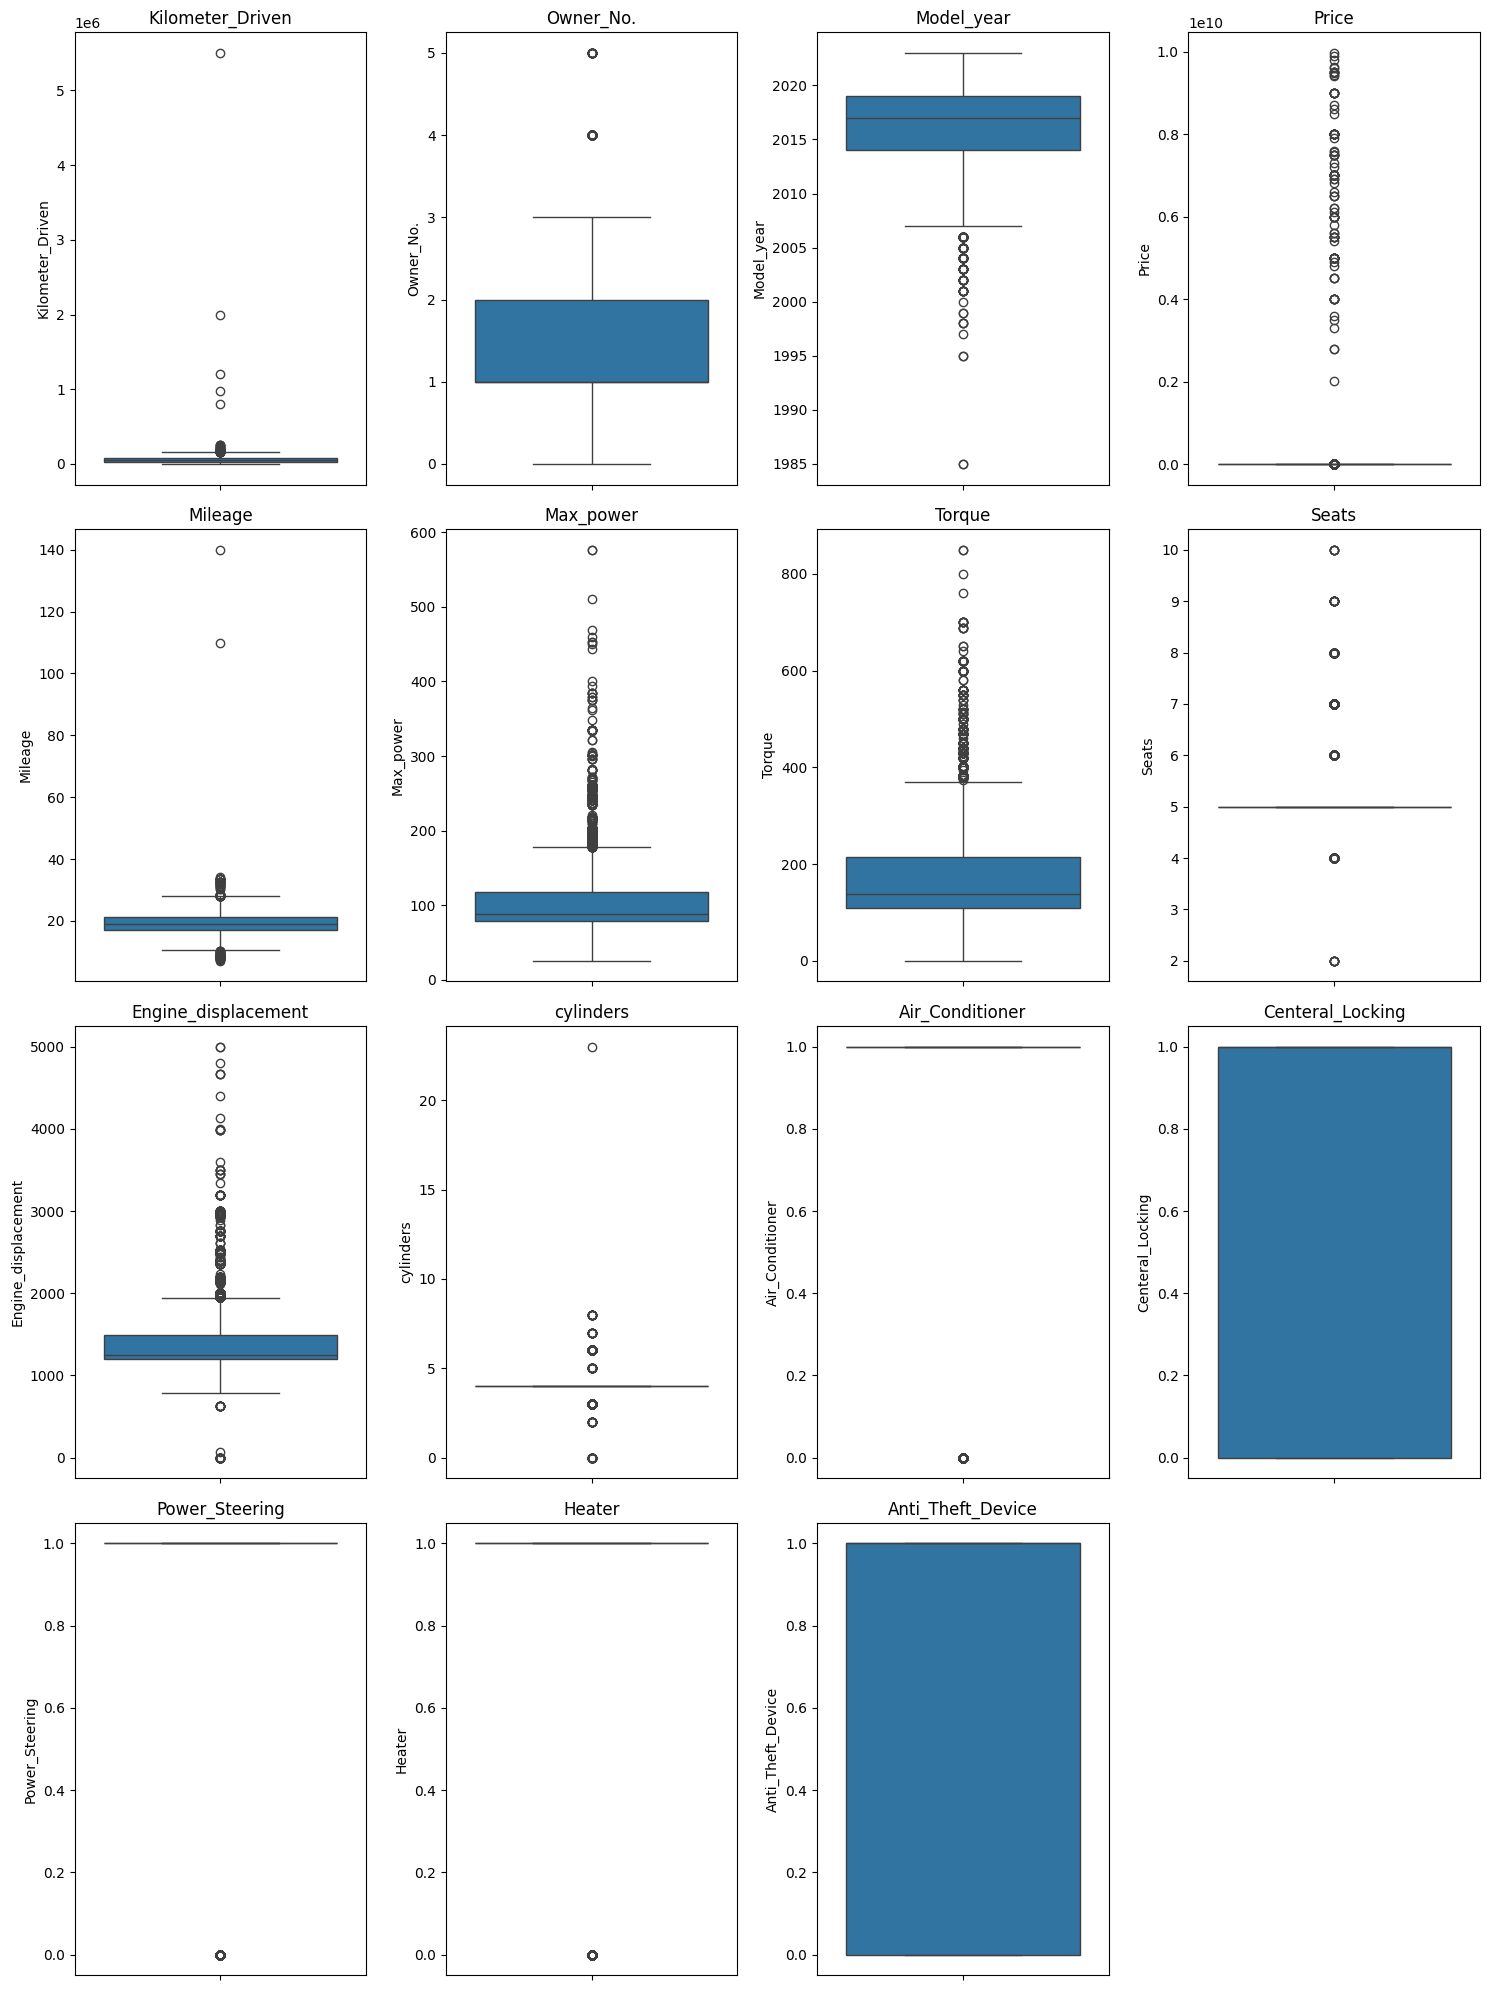

In [46]:
#seeing if outliers are present 
def plot_boxplots(new_data, columns):
    num_cols = len(columns)
    num_rows = int(np.ceil(num_cols / 4))  # Adjust number of rows based on number of columns
    num_cols_subplot = min(num_cols, 4)  # Ensure at most 4 columns per row
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows
    
    for i, column in enumerate(columns):
        plt.subplot(num_rows, num_cols_subplot, i + 1)  # Adjust subplot grid
        sns.boxplot(new_data[column])
        plt.title(column)
    
    plt.tight_layout()
    plt.show()

# Example usage
numerical_cols = new_data.select_dtypes(include=['float', 'int']).columns
plot_boxplots(new_data, numerical_cols)

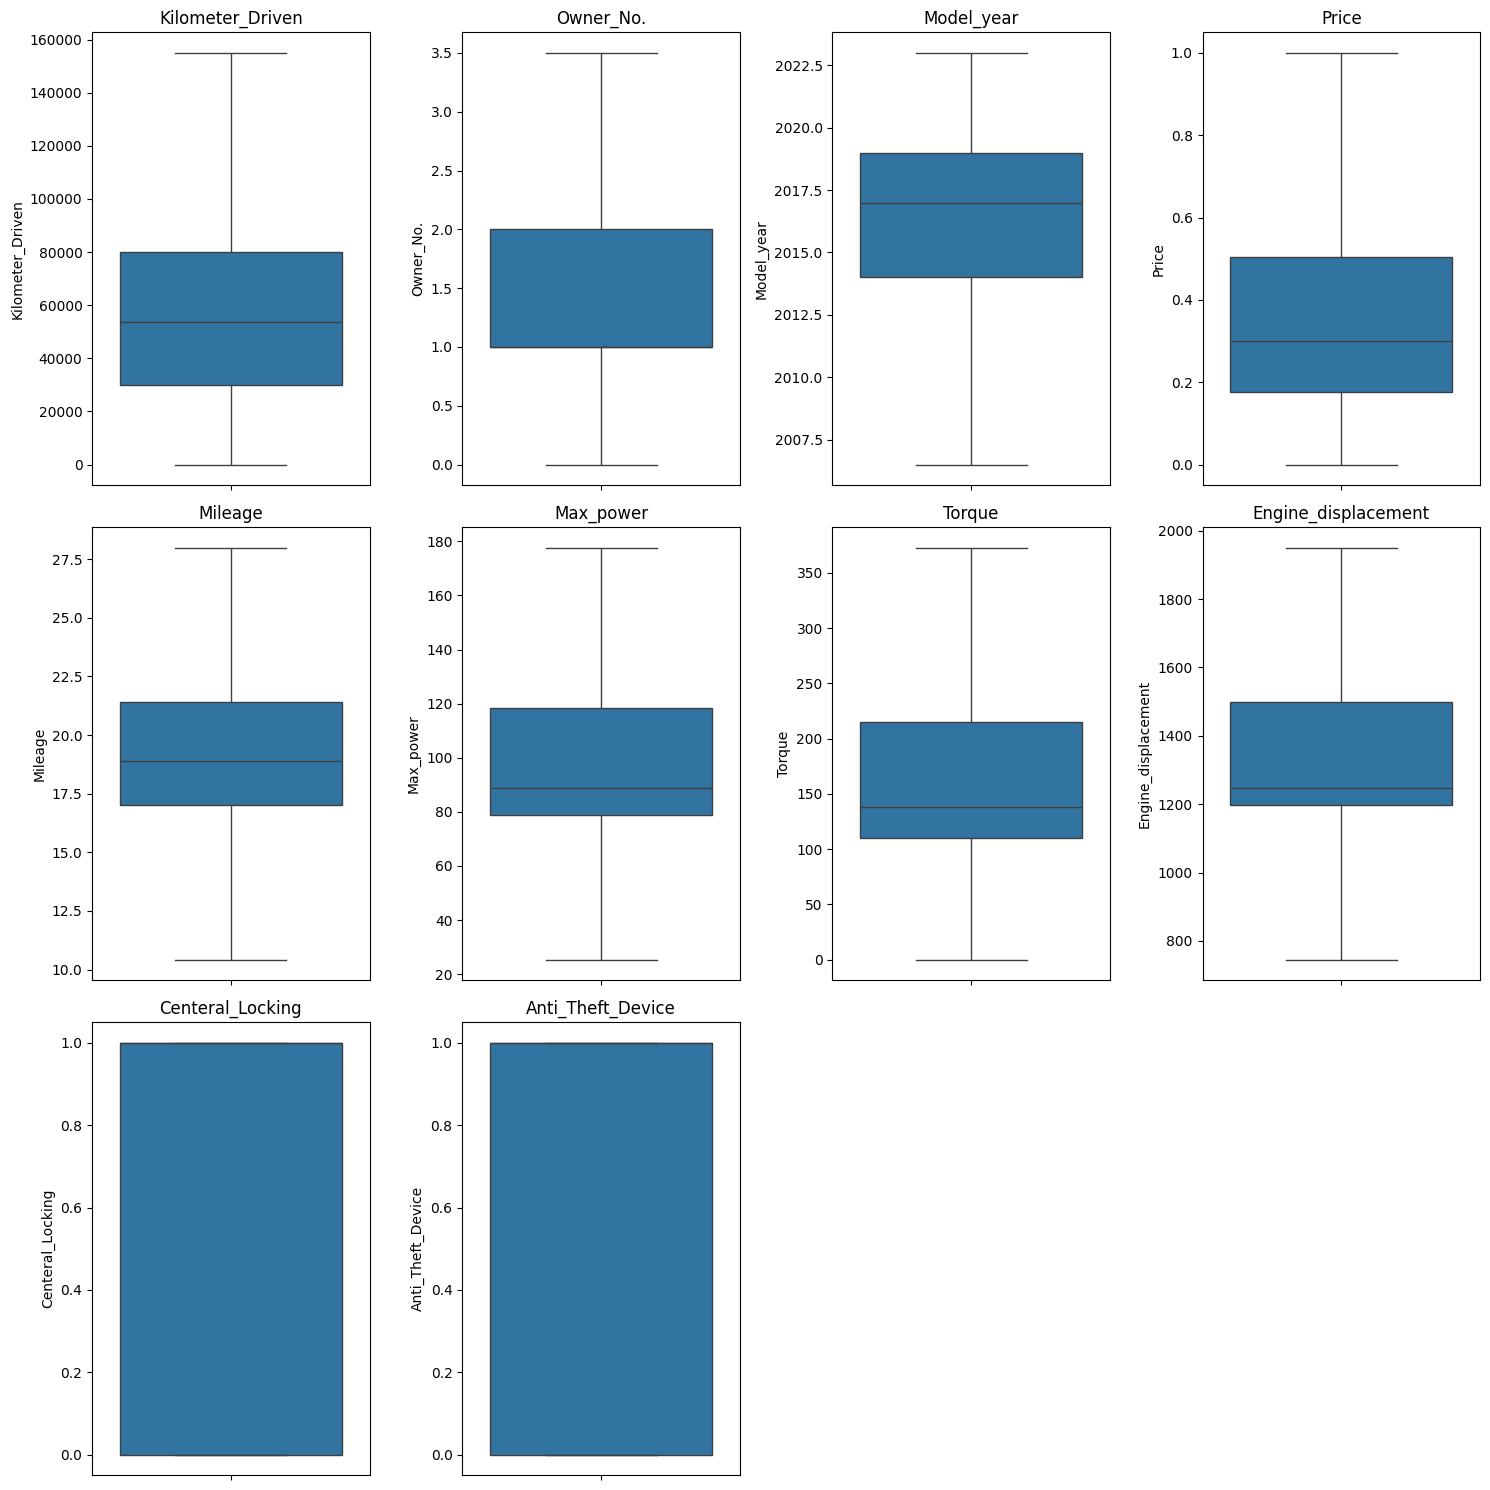

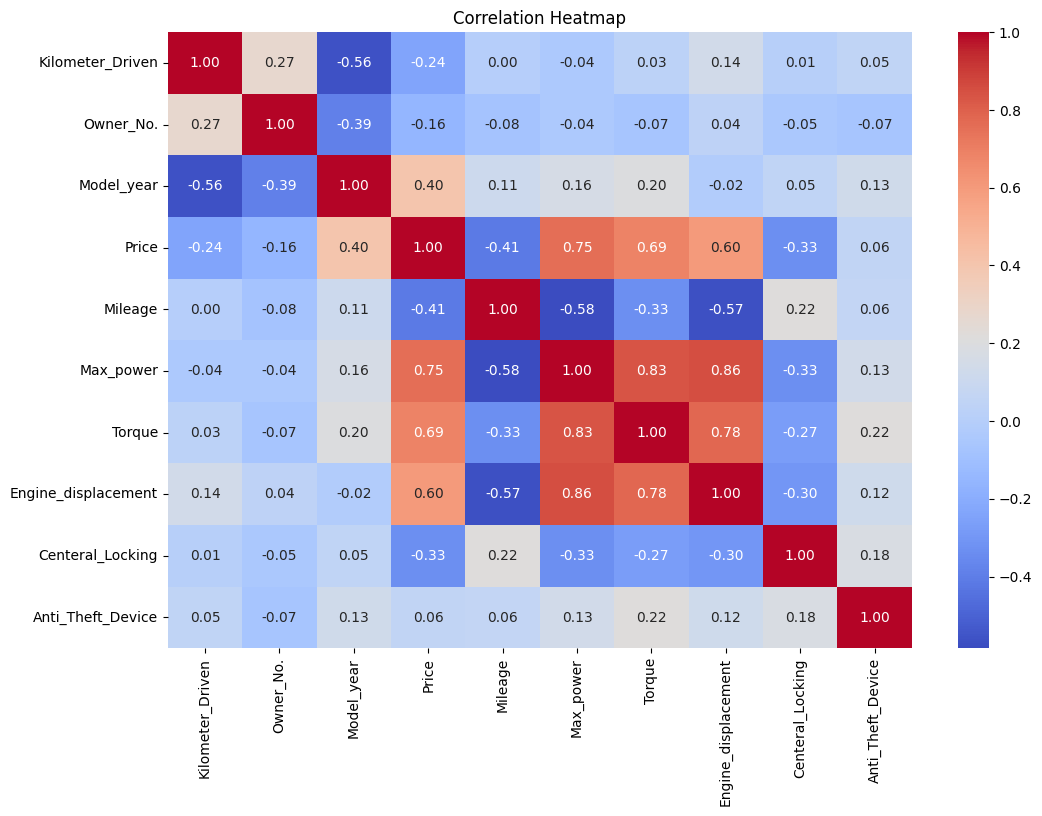

In [67]:
# Function to cap outliers using IQR
def cap_outliers_iqr(new_data, columns):
    for col in columns:
        Q1 = new_data[col].quantile(0.25)
        Q3 = new_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_data[col] = np.clip(new_data[col], lower_bound, upper_bound)
    return new_data

# Box plots to identify outliers
def plot_boxplots(new_data, columns):
    num_cols = len(columns)
    num_rows = int(np.ceil(num_cols / 4))  # Adjust number of rows based on number of columns
    num_cols_subplot = min(num_cols, 4)  # Ensure at most 4 columns per row
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows
   
    for i, column in enumerate(columns):
        if new_data[column].nunique() > 1:  # Skip columns with a single unique value
            plt.subplot(num_rows, num_cols_subplot, i + 1)  # Adjust subplot grid
            sns.boxplot(data=new_data[column])
            plt.title(column)
        else:
            print(f"Skipping box plot for {column} due to limited variance.")
   
    plt.tight_layout()
    plt.show()

# Correlation heatmap
def plot_correlation_heatmap_fix(new_data):
    # Select only numeric columns
    numeric_df = new_data.select_dtypes(include=['float64', 'int64'])
   
    # Remove columns with only NaN values after capping outliers
    numeric_df = numeric_df.dropna(axis=1, how='all')
   
    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
    
# Example usage
numeric_cols = new_data.select_dtypes(include=['float64', 'int64']).columns
# Filter columns with a single unique value or low variability
cols_to_plot = [col for col in numeric_cols if new_data[col].nunique() > 1 and new_data[col].std() > 0]
# Cap outliers before plotting
new_data = cap_outliers_iqr(new_data, cols_to_plot)
plot_boxplots(new_data, cols_to_plot)
plot_correlation_heatmap_fix(new_data[cols_to_plot])


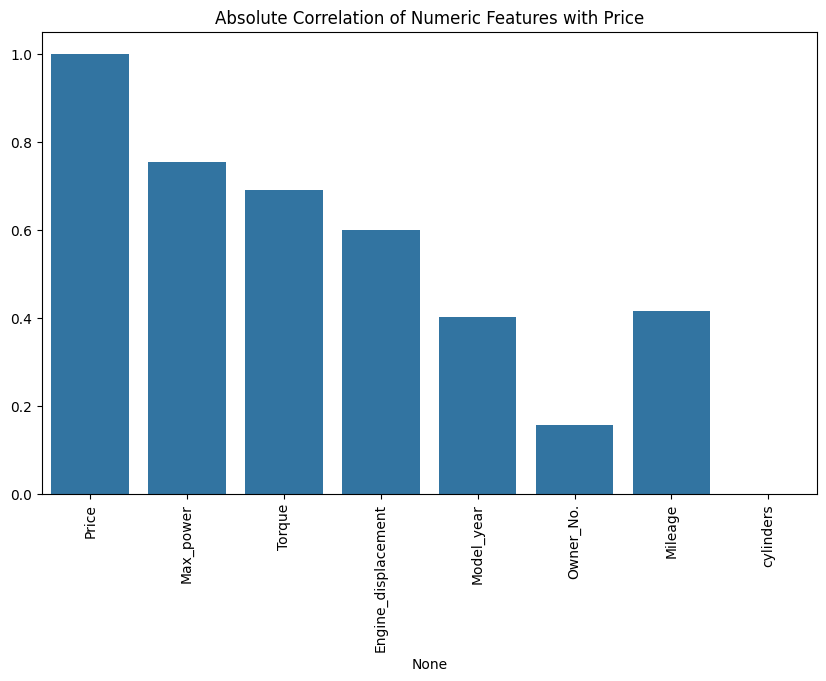

Features with high absolute correlation with Price:
 Price                  1.000000
Max_power              0.754002
Torque                 0.689153
Engine_displacement    0.598292
Model_year             0.400361
Owner_No.              0.155322
Mileage                0.414790
cylinders                   NaN
Name: Price, dtype: float64


In [48]:
# Correlation Analysis with the Target Variable Price
# Select only numeric columns for correlation calculation
numeric_cols = new_data.select_dtypes(include=['float64', 'int64']).columns
# Exclude specific columns
numeric_cols = [col for col in numeric_cols if col not in ['Air_Conditioner','Centeral_Locking' ,'Power_Steering','Heater','Anti_Theft_Device']]

# Calculate correlation of all numeric features with the target variable 'Price'
correlation_matrix = new_data[numeric_cols].corr()

# Extract correlation with 'Price'
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)


# Convert correlation values to absolute for visualization
correlation_with_price_abs = np.abs(correlation_with_price)

# Plot the absolute correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price_abs.index, y=correlation_with_price_abs.values)
plt.xticks(rotation=90)
plt.title('Absolute Correlation of Numeric Features with Price')
plt.show()

# Print features with high absolute correlation with Price
print("Features with high absolute correlation with Price:\n", correlation_with_price_abs)


In [49]:
#new_data.to_csv('cleaned_cardata.csv', index=False)
new_data=pd.read_csv(r"E:\vscode\cleaned_cardata.csv")

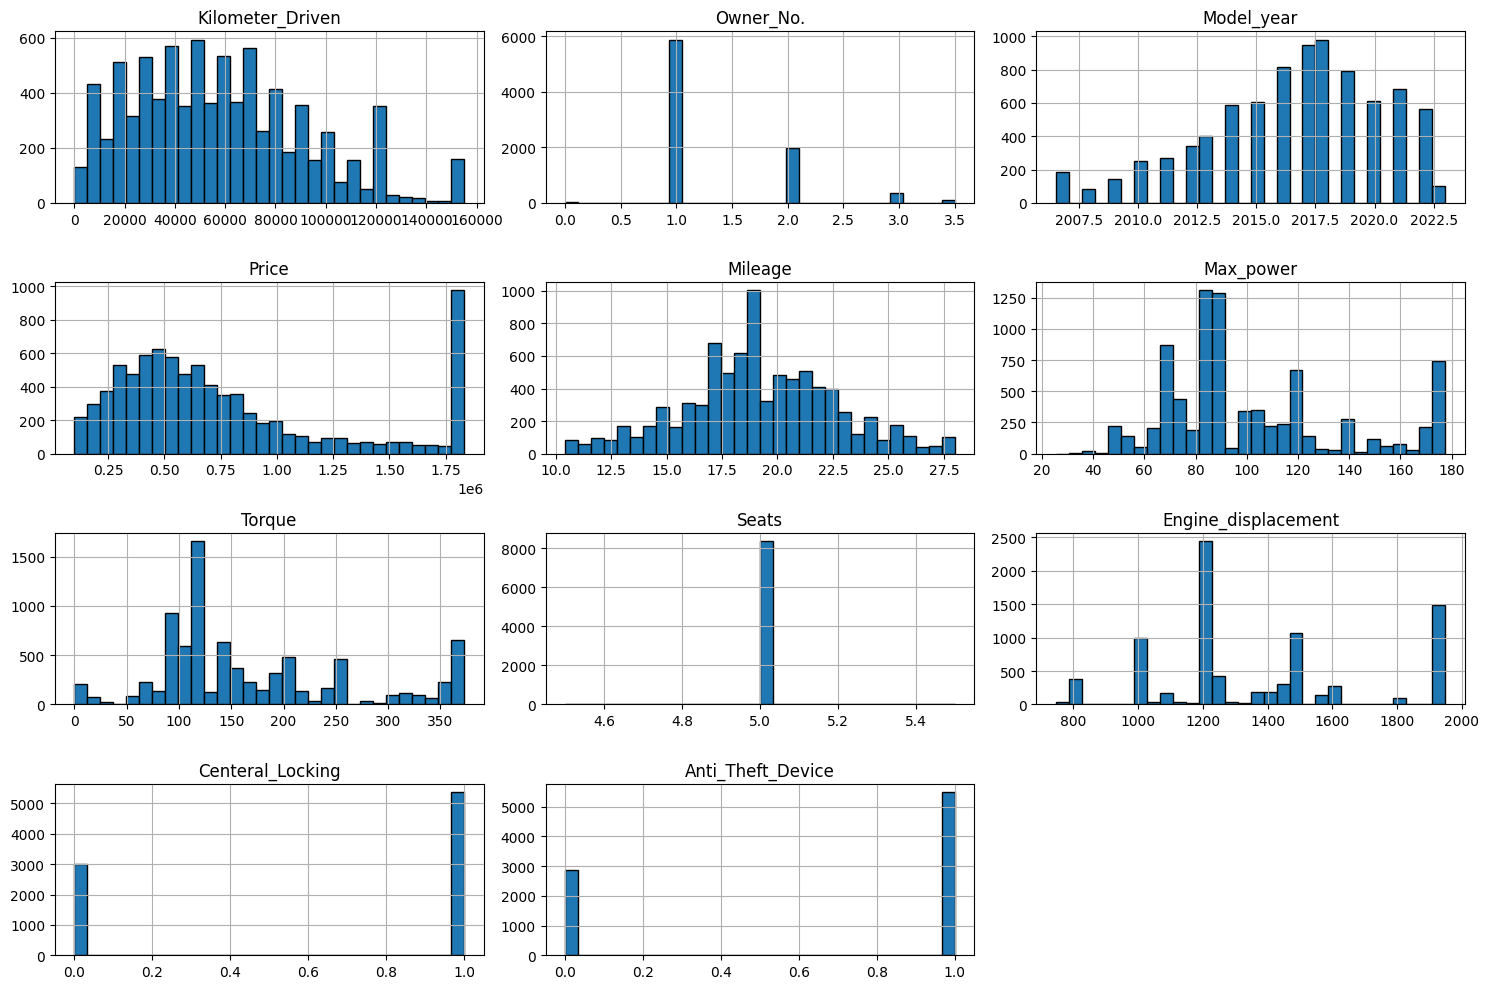

In [50]:

# Example usage
numeric_cols = new_data.select_dtypes(include=['float64', 'int64']).columns

# Filter columns with a single unique value or low variability
cols_to_plot = [col for col in numeric_cols if new_data[col].nunique() > 1 and new_data[col].std() > 0]

# Cap outliers before plotting
new_data = cap_outliers_iqr(new_data, cols_to_plot)


# Histogram for numerical features
def plot_histograms(new_data, columns):
    new_data[columns].hist(figsize=(15, 10), bins=30, edgecolor='black')
    plt.tight_layout()
    plt.show()
plot_histograms(new_data, cols_to_plot)

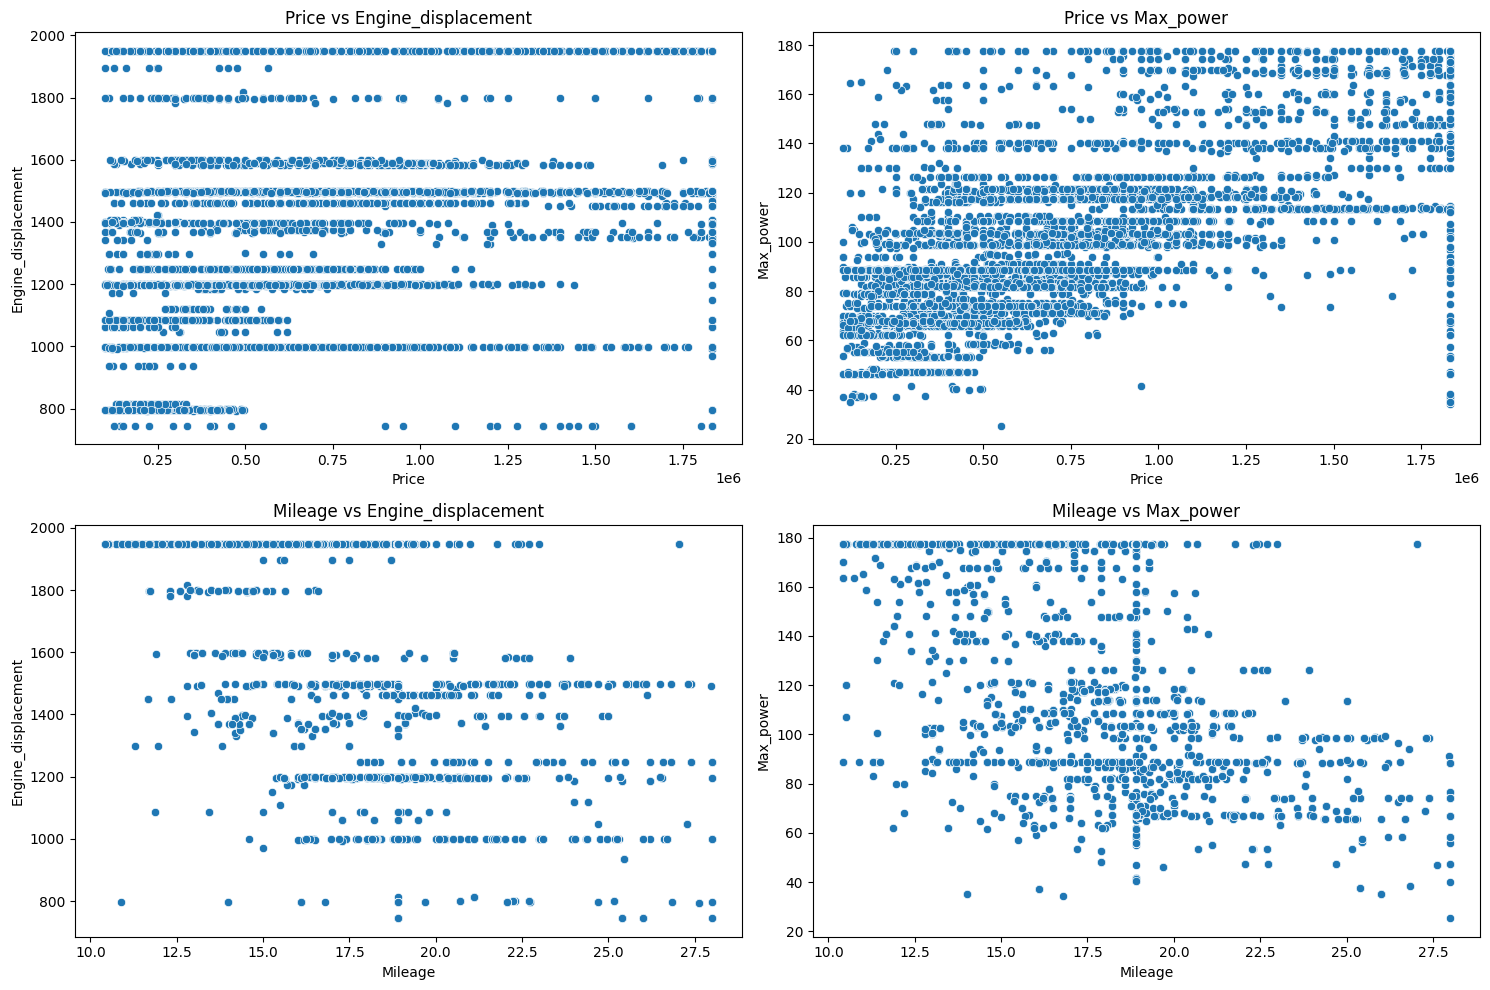

In [51]:

numeric_cols = new_data.select_dtypes(include=['float64', 'int64']).columns

# Filter columns with a single unique value or low variability
cols_to_plot = [col for col in numeric_cols if new_data[col].nunique() > 1 and new_data[col].std() > 0]

# Cap outliers before plotting
new_data = cap_outliers_iqr(new_data, cols_to_plot)
    # Scatter plots for feature relationships
def plot_scatter_plots(new_data, x_cols, y_cols):
    plt.figure(figsize=(15, 10))
    for i, x in enumerate(x_cols):
        for j, y in enumerate(y_cols):
            plt.subplot(len(x_cols), len(y_cols), i*len(y_cols) + j + 1)
            sns.scatterplot(data=new_data, x=x, y=y)
            plt.title(f'{x} vs {y}')
    plt.tight_layout()
    plt.show()
plot_scatter_plots(new_data, ['Price', 'Mileage'], ['Engine_displacement', 'Max_power'])

In [52]:
# Assuming 'new_data' contains your training data
col= ['Price']
scaler_2 = MinMaxScaler()

# Fit the scaler to your training data
scaler_2.fit(new_data[col])

# Transform the training data (optional, but usually done)
new_data[col] = scaler_2.transform(new_data[col])
new_data

,Fuel_type,Body_type,Kilometer_Driven,Transmission,Owner_No.,Original_equipment_manufacturer,Model,Model_year,Variant_name,Price,Mileage,Max_power,Torque,Seats,Engine_type,Engine_displacement,cylinders,Air_Conditioner,Centeral_Locking,Power_Steering,Heater,Anti_Theft_Device,City
0,Petrol,Hatchback,20000,Automatic,1.0,Volkswagen,Volkswagen Polo,2022.0,1.0 TSI Highline Plus AT,0.545192,16.47,108.62,175.0,5,1.0L TSI Petrol,999.0,4.0,1,1,1,1,1,Hyderabad
1,Petrol,Hatchback,85582,Manual,2.0,Hyundai,Hyundai EON,2014.0,Era Plus,0.092405,21.10,55.20,74.5,5,Petrol Engine,814.0,4.0,1,0,1,1,1,Hyderabad
2,Petrol,SUV,10000,Manual,1.0,Hyundai,Hyundai Venue,2023.0,S BSVI,0.493792,18.90,81.80,113.8,5,1.2 Kappa Petrol,1197.0,4.0,1,0,1,1,0,Hyderabad
3,Petrol,Hatchback,50750,Manual,1.0,Maruti,Maruti Baleno,2017.0,1.2 Alpha,0.329772,21.40,83.10,115.0,5,VVT Petrol Engine,1197.0,4.0,1,1,1,1,1,Hyderabad
4,Petrol,SUV,10000,Automatic,1.0,Mahindra,Mahindra Thar,2022.0,LX 4-Str Hard Top AT BSVI,1.000000,18.90,150.00,320.0,5,mStallion 150 TGDi Engine,1949.5,4.0,1,0,1,1,0,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Diesel,SUV,155000,Manual,2.0,Toyota,Toyota Fortuner,2012.0,4x4 MT,0.894600,12.55,168.50,343.0,5,D-4D Diesel Engine,1949.5,4.0,1,0,1,1,1,Bangalore
8365,Petrol,Sedan,56000,Manual,2.0,Maruti,Maruti SX4,2008.0,Zxi BSIII,0.132833,15.00,104.68,145.0,5,In-Line Engine,1586.0,4.0,1,0,1,1,0,Bangalore
8366,Petrol,Hatchback,42000,Manual,2.0,Honda,Honda Brio,2014.0,S MT,0.187699,19.40,86.80,109.0,5,i-VTEC Engine,1198.0,4.0,1,1,1,1,1,Bangalore
8367,Diesel,Hatchback,93003,Manual,1.0,Hyundai,Hyundai i20,2018.0,1.4 Asta Dual Tone,0.375397,22.54,88.73,219.7,5,U2 CRDI Diesel Engine,1396.0,4.0,1,1,1,1,1,Bangalore


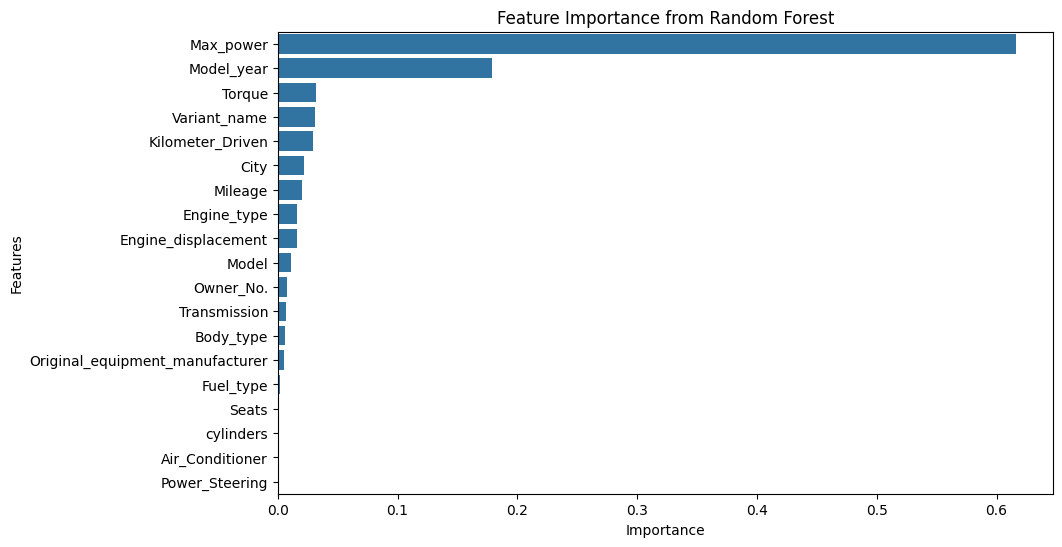

Top features based on importance:
 Max_power                          0.616127
Model_year                         0.178428
Torque                             0.032323
Variant_name                       0.030770
Kilometer_Driven                   0.029229
City                               0.022287
Mileage                            0.020076
Engine_type                        0.016069
Engine_displacement                0.015905
Model                              0.011268
Owner_No.                          0.007939
Transmission                       0.007016
Body_type                          0.005624
Original_equipment_manufacturer    0.004898
Fuel_type                          0.002041
Seats                              0.000000
cylinders                          0.000000
Air_Conditioner                    0.000000
Power_Steering                     0.000000
dtype: float64


In [53]:
# Feature Importance using Random Forest

# Preprocessing: Encoding categorical features (use LabelEncoder for simplicity)
categorical_columns = new_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    new_data[col] = le.fit_transform(new_data[col].astype(str))
    label_encoders[col] = le

# Define features (X) and target (y)
X = new_data.drop(['Price','Heater' , 'Anti_Theft_Device','Centeral_Locking'], axis=1)  # Exclude specific columns
y = new_data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Print the top features
print("Top features based on importance:\n", feature_importance)

In [54]:
selected_features=[ 'Mileage','Model_year','Kilometer_Driven','Engine_displacement', 'Fuel_type','Model', 
    'Transmission', 'Owner_No.','Body_type','City','Max_power' ]
# Ensure the dataset contains only the selected features along with the target variable 'Price'
final_data = new_data[selected_features + ['Price']]

# Display the final dataframe to verify
final_data.head()

,Mileage,Model_year,Kilometer_Driven,Engine_displacement,Fuel_type,Model,Transmission,Owner_No.,Body_type,City,Max_power,Price
0,16.47,2022.0,20000,999.0,4,300,0,1.0,2,3,108.62,0.545192
1,21.10,2014.0,85582,814.0,4,74,1,2.0,2,3,55.20,0.092405
2,18.90,2023.0,10000,1197.0,4,85,1,1.0,7,3,81.80,0.493792
3,21.40,2017.0,50750,1197.0,4,157,1,1.0,2,3,83.10,0.329772
4,18.90,2022.0,10000,1949.5,4,144,0,1.0,7,3,150.00,1.000000


In [55]:
#1. Train-Test Split
# Separate features (X) and target (y)
X = final_data.drop('Price', axis=1)
y = final_data['Price']

# Perform the train-test split (using 80-20 ratio here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression Model :

Linear Regression CV Mean MSE: 0.027090925058219806
Linear Regression - MSE: 0.028724358957185444, MAE: 0.09986131468488202, R²: 0.6662881172066121


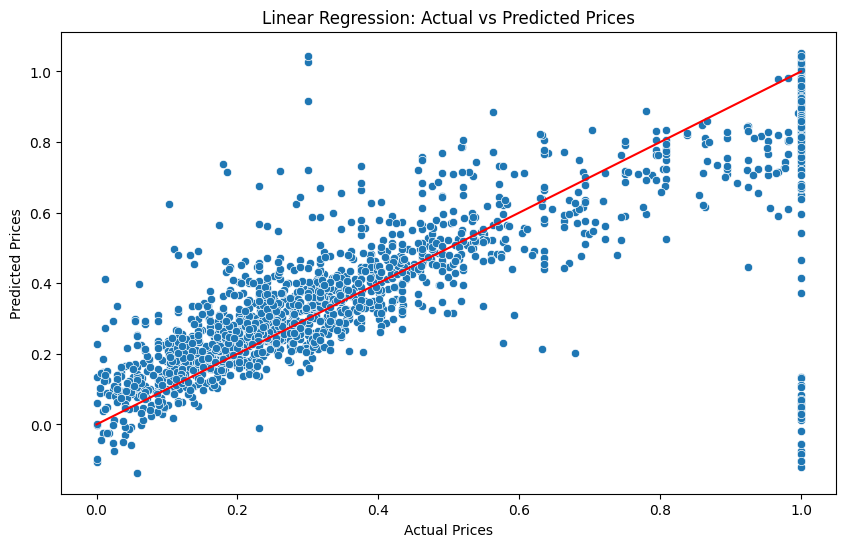

Best Ridge Alpha: {'alpha': 10}
Best Lasso Alpha: {'alpha': 0.01}


In [56]:
from sklearn.model_selection import cross_val_score, GridSearchCV
# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Cross-Validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression CV Mean MSE: {-cv_scores.mean()}')

# Model Prediction
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning for Ridge and Lasso using Grid Search
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(f'Best Ridge Alpha: {ridge_grid.best_params_}')

lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print(f'Best Lasso Alpha: {lasso_grid.best_params_}')



Gradient Boosting with Cross-Validation and Hyperparameter Tuning (Random Search)

Gradient Boosting CV Mean MSE: 0.014683215806784819
Gradient Boosting - MSE: 0.014345754542455062, MAE: 0.0680655599443958, R²: 0.8333348790972092


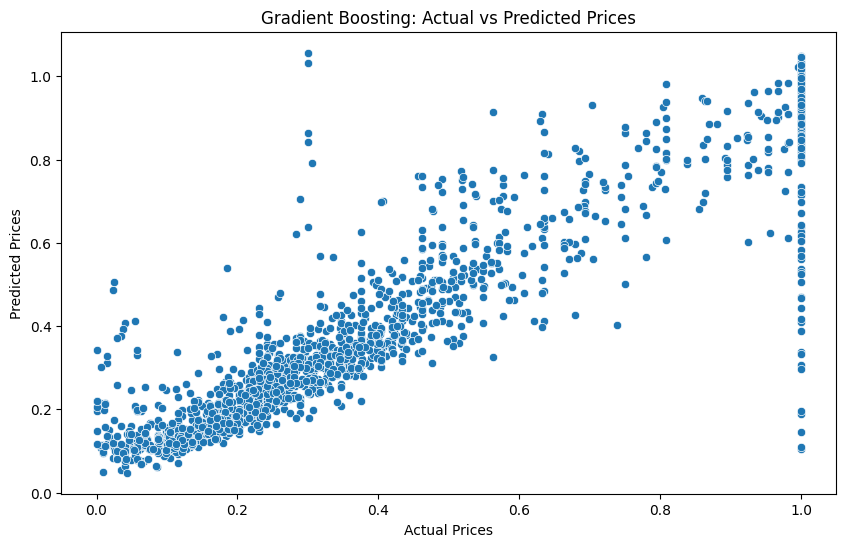

Best Gradient Boosting Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}


In [57]:
from sklearn.model_selection import RandomizedSearchCV
# Model Training
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Cross-Validation
gbr_cv_scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting CV Mean MSE: {-gbr_cv_scores.mean()}')

# Model Prediction
y_pred_gbr = gbr_model.predict(X_test)

# Model Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting - MSE: {mse_gbr}, MAE: {mae_gbr}, R²: {r2_gbr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
gbr_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
gbr_random = RandomizedSearchCV(gbr_model, gbr_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
gbr_random.fit(X_train, y_train)

print(f'Best Gradient Boosting Params: {gbr_random.best_params_}')

DecisionTree with Cross-Validation and Hyperparameter Tuning

Decision Tree CV Mean MSE: 0.021281183834971008
Decision Tree - MSE: 0.021754278050570137, MAE: 0.094238711080042, R²: 0.7472646439947577


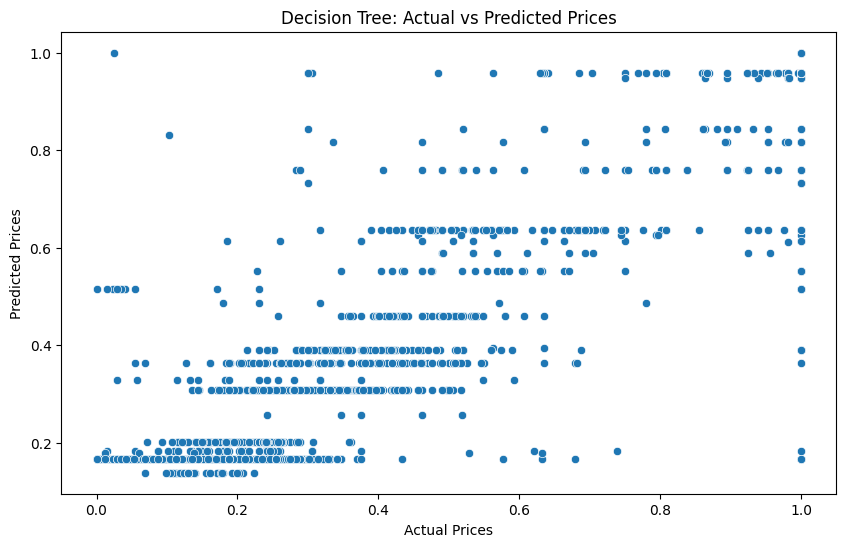

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [58]:

from sklearn.model_selection import GridSearchCV
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Pruning
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Cross-Validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Decision Tree CV Mean MSE: {-dt_cv_scores.mean()}')

# Model Prediction
y_pred_dt = dt_model.predict(X_test)

# Model Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Grid Search
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print(f'Best Decision Tree Params: {dt_grid.best_params_}')

Random Forest with Cross-Validation and Hyperparameter Tuning (Random Search)

Random Forest CV Mean MSE: 0.013654912796831897
Random Forest - MSE: 0.013074330993619614, MAE: 0.059271850931790826, R²: 0.8481059361969392


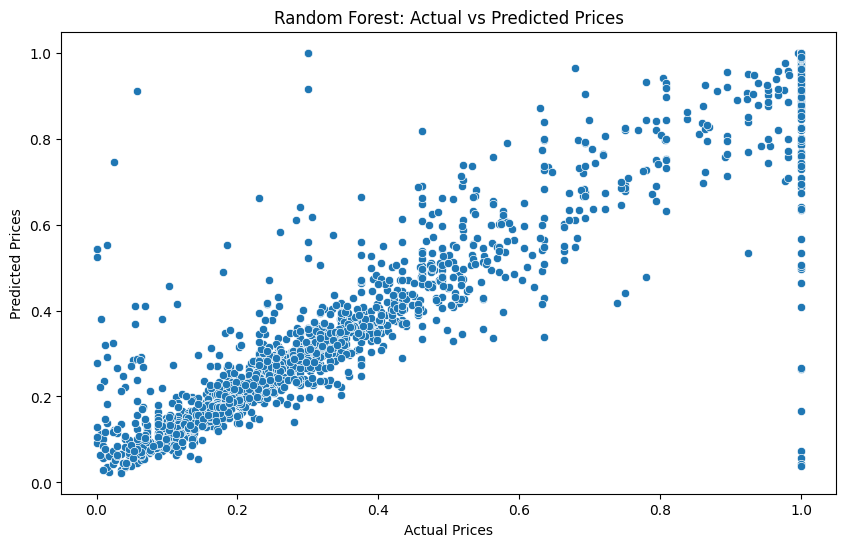

Best Random Forest Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


In [59]:
# Model Training with Bagging
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(rf_model, rf_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)

print(f'Best Random Forest Params: {rf_random.best_params_}')





In [60]:

# Store model evaluation metrics
model_results = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_gbr, mse_dt, mse_rf],
    'MAE': [mae_lr, mae_gbr, mae_dt, mae_rf],
    'R²': [r2_lr, r2_gbr, r2_dt, r2_rf]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df)

# Identify the best model based on the highest R² and the lowest MSE/MAE
best_model_idx = comparison_df['R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_mse = comparison_df.loc[best_model_idx, 'MSE']
best_model_mae = comparison_df.loc[best_model_idx, 'MAE']
best_model_r2 = comparison_df.loc[best_model_idx, 'R²']

# Print the summary of the best model
print("\nBest Model Summary:")
print(f"Best Model: {best_model_name}")
print(f"MSE: {best_model_mse}")
print(f"MAE: {best_model_mae}")
print(f"R²: {best_model_r2}")

Model Comparison Table:
               Model       MSE       MAE        R²
0  Linear Regression  0.028724  0.099861  0.666288
1  Gradient Boosting  0.014346  0.068066  0.833335
2      Decision Tree  0.021754  0.094239  0.747265
3      Random Forest  0.013074  0.059272  0.848106

Best Model Summary:
Best Model: Random Forest
MSE: 0.013074330993619614
MAE: 0.059271850931790826
R²: 0.8481059361969392


In [61]:
best_rf_model = rf_random.best_estimator_

# Save the best model to a file for future use
joblib.dump(best_rf_model, 'best_random_forest_model1.pkl')
print("Best Random Forest model saved as 'best_random_forest_model.pkl'")

Best Random Forest model saved as 'best_random_forest_model.pkl'


In [62]:
import joblib
joblib.dump(label_encoders,'label_encoder.pkl')
joblib.dump(scaler_2,'min_max.pkl')

['min_max.pkl']

C:\Users\Tanvi\AppData\Local\Temp\ipykernel_19432\572457072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:,'Car_Age'] = 2024 - final_data['Model_year']
C:\Users\Tanvi\AppData\Local\Temp\ipykernel_19432\572457072.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:,'Mileage_normalized'] = final_data['Mileage'] / final_data['Car_Age']


Random Forest CV Mean MSE: 0.014207036785473914
Random Forest - MSE: 0.013248660722397207, MAE: 0.060877971204593415, R²: 0.8460806202585072
Training Time: 38.78179144859314 seconds


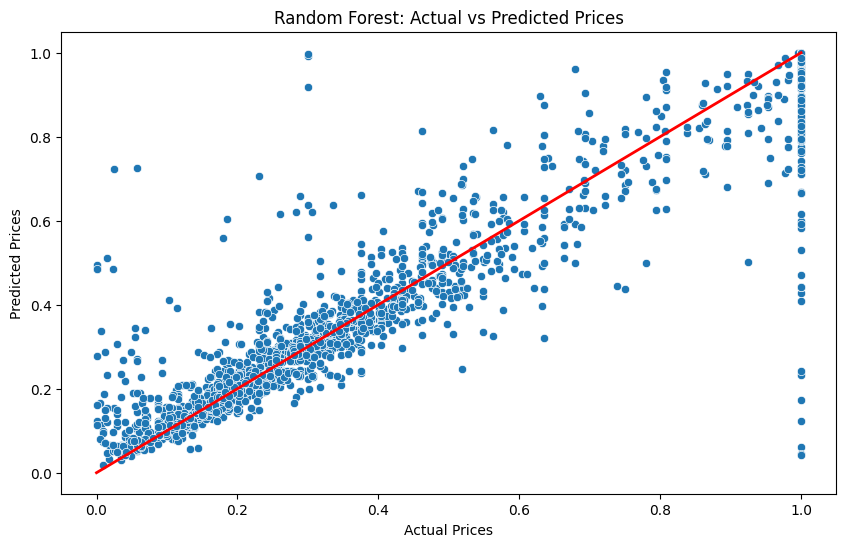

In [63]:
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

# Create 'Car_Age' feature and normalize mileage
final_data.loc[:,'Car_Age'] = 2024 - final_data['Model_year']
final_data.loc[:,'Mileage_normalized'] = final_data['Mileage'] / final_data['Car_Age']

# Check if columns exist before dropping
columns_to_drop = ['Price','Seats']
existing_columns_to_drop = [col for col in columns_to_drop if col in final_data.columns]

# Prepare data for model training
X = final_data.drop(existing_columns_to_drop, axis=1)
y = final_data['Price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model with RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

start_time = time.time()
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
end_time = time.time()

# Best model
final_model = rf_random.best_estimator_

# Cross-validation
rf_cv_scores = cross_val_score(final_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model prediction
y_pred_rf = final_model.predict(X_test)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')
print(f'Training Time: {end_time - start_time} seconds')

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()


In [64]:

 # Save the final model to a file for future use
joblib.dump(final_model, 'final_random_forest_model1.pkl')
print("Best Random Forest model saved as 'final_random_forest_model.pkl'")

Best Random Forest model saved as 'final_random_forest_model.pkl'


In [65]:
from sklearn.linear_model import Ridge, Lasso

# Ridge (L2) Regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print(f"Ridge Regression MSE: {mean_squared_error(y_test, ridge_pred)}")

# Lasso (L1) Regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print(f"Lasso Regression MSE: {mean_squared_error(y_test, lasso_pred)}")

Ridge Regression MSE: 0.028192120266910394
Lasso Regression MSE: 0.031413073962851056


In [66]:


# Define features and target
X = final_data.drop(['Price'], axis=1, errors='ignore')
y = final_data['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} MSE: {mse}")

Random Forest MSE: 0.01309536490576142
Ridge Regression MSE: 0.02534568210697939
Lasso Regression MSE: 0.028697863837112633


RANDOM FOREST REGRESSOR GIVE BEST PREDICTION COMPARE TO OTHER MODELS.SO WE SAVE THE FINALISED RANDOM FORESTMODEL FOR FUTURE USE .